<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/RegresionLineal_sp500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data=yf.download("^GSPC",period="1y",interval="1h").reset_index()
data.columns=["Fecha","Apertura","Maximo","Minimo","Cierre","Cierre_Adj","Volume"]
data.index=data.Fecha
data

[*********************100%***********************]  1 of 1 completed


,Fecha,Apertura,Maximo,Minimo,Cierre,Cierre_Adj,Volume
Fecha,,,,,,,
2022-06-29 09:30:00-04:00,2022-06-29 09:30:00-04:00,3825.090088,3836.500000,3799.020020,3824.600098,3824.600098,0
2022-06-29 10:30:00-04:00,2022-06-29 10:30:00-04:00,3824.659912,3835.209961,3806.169922,3813.479980,3813.479980,273730086
2022-06-29 11:30:00-04:00,2022-06-29 11:30:00-04:00,3813.409912,3825.070068,3799.129883,3799.750000,3799.750000,206762009
2022-06-29 12:30:00-04:00,2022-06-29 12:30:00-04:00,3799.760010,3817.389893,3799.580078,3809.939941,3809.939941,186857411
2022-06-29 13:30:00-04:00,2022-06-29 13:30:00-04:00,3809.919922,3830.489990,3806.000000,3826.719971,3826.719971,185189000
...,...,...,...,...,...,...,...
2023-06-28 12:30:00-04:00,2023-06-28 12:30:00-04:00,4381.330078,4381.399902,4362.370117,4373.589844,4373.589844,208264449
2023-06-28 13:30:00-04:00,2023-06-28 13:30:00-04:00,4373.810059,4376.350098,4366.770020,4374.720215,4374.720215,185833000
2023-06-28 14:30:00-04:00,2023-06-28 14:30:00-04:00,4374.660156,4375.709961,4362.709961,4369.729980,4369.729980,224553000


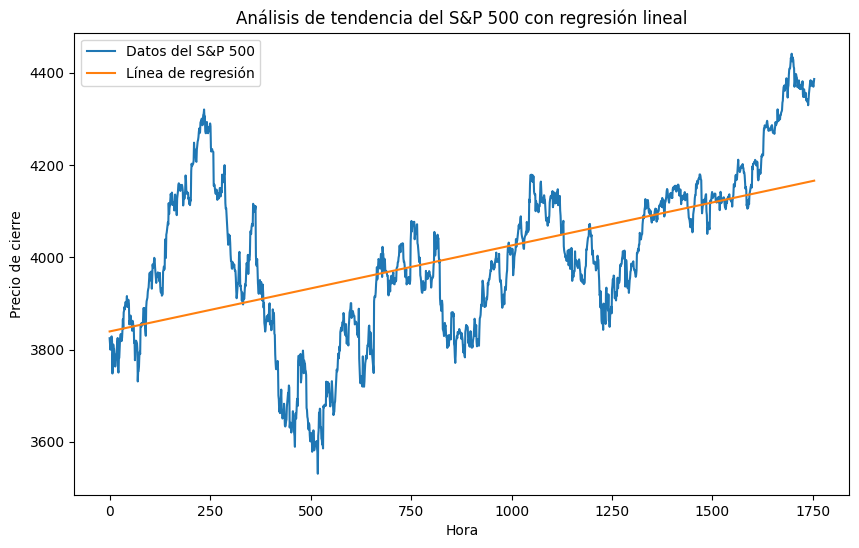

Pendiente: 0.18640550475049983


In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.arange(len(data)).reshape(-1, 1)
y = data.Cierre

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Calcular las predicciones de la línea de regresión
predictions = model.predict(X)

# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='Datos del S&P 500')
plt.plot(X, predictions, label='Línea de regresión')
plt.xlabel('Hora')
plt.ylabel('Precio de cierre')
plt.legend()
plt.title('Análisis de tendencia del S&P 500 con regresión lineal')
plt.show()

# Obtener la pendiente de la línea de regresión
slope = model.coef_[0]
print('Pendiente:', slope)


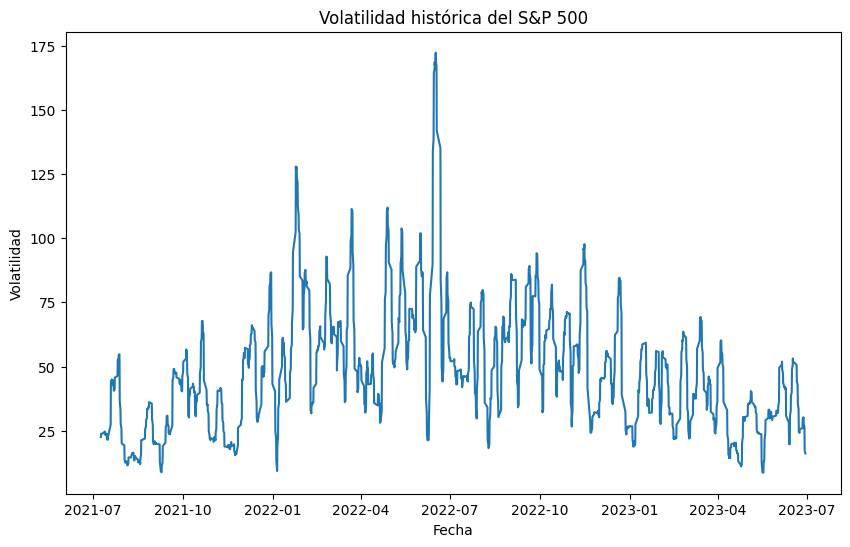

In [36]:
# Calcular la volatilidad histórica (desviación estándar)
data['Volatilidad'] = data['Cierre'].rolling(window=50).std()

# Graficar la volatilidad
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Volatilidad'])
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.title('Volatilidad histórica del S&P 500')
plt.show()


<ipython-input-39-d63f52780cdb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pivot'] = (data['Maximo'] + data['Minimo'] + data['Cierre']) / 3
<ipython-input-39-d63f52780cdb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Soporte'] = data['Pivot'] - (data['Maximo'] - data['Minimo'])
<ipython-input-39-d63f52780cdb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

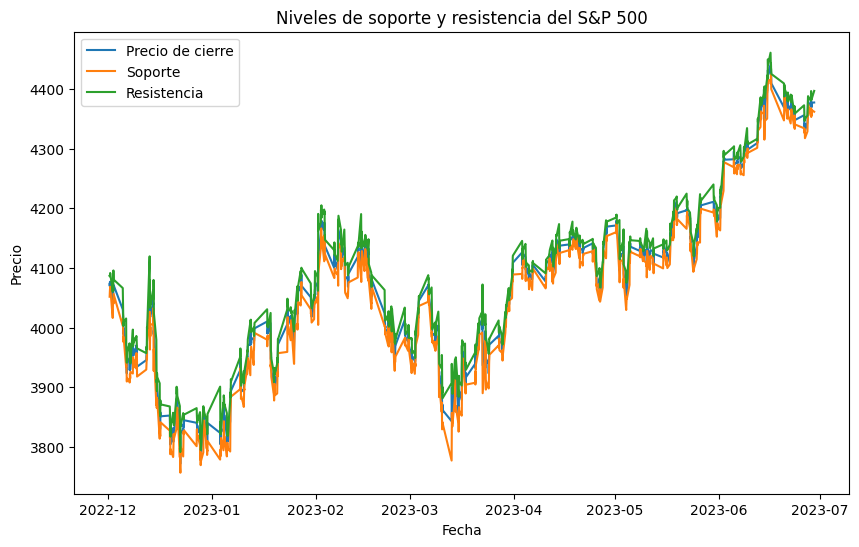

In [39]:
# Calcular los niveles de soporte y resistencia utilizando técnicas como el método de pivotes
data=data.iloc[-1000:]

# Calcular los puntos pivote
data['Pivot'] = (data['Maximo'] + data['Minimo'] + data['Cierre']) / 3

# Calcular los niveles de soporte y resistencia
data['Soporte'] = data['Pivot'] - (data['Maximo'] - data['Minimo'])
data['Resistencia'] = data['Pivot'] + (data['Maximo'] - data['Minimo'])

# Graficar los datos con los niveles de soporte y resistencia
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Cierre'], label='Precio de cierre')
plt.plot(data.index, data['Soporte'], label='Soporte')
plt.plot(data.index, data['Resistencia'], label='Resistencia')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.title('Niveles de soporte y resistencia del S&P 500')
plt.show()
